# Census Income Project

# Problem Statement:


* This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization,   Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) &&   (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.



* Description of fnlwgt (final weight)



* The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

  1 A single cell estimate of the population 16+ for each state.

  2 Controls for Hispanic Origin by age and sex.

  3 Controls by Race, age and sex.




* We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split

#for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('census_income.csv')
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


**Details of the Dataset The dataset contains a mix of categorical and numeric type data**

**Categorical Attributes**

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. Individual work category

**Education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual’s highest education degree

**Marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status

**Occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspect, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. Individual’s occupation

**Relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual’s relation in a family

**Race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

**Sex:** Female, Male.

**Native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad Tobago, Peru, Hong, Holland-Netherlands. Individual’s native country

**Continuous Attributes**

**Age:** Age of an individual.

**fnlwgt:** final weight,The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

**capital-gain:** continuous.

**-loss:** continuous.

**hours-per-week:** Individual’s working hour per week

In [3]:
df.shape

(32560, 15)

**There are 32560 rows and 15 columns in our dataset***

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

**We can see many object data type columns in our dataset which we need to transform into float values to deal with the data. We will use Ordinal Encoder to Encode our Data**

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

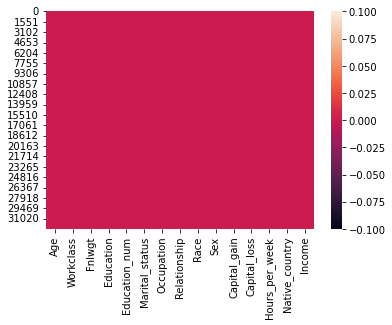

In [6]:
#Visualizing null values through heatmap
import seaborn as sns
sns.heatmap(df.isnull())

**We cannot find any null values in the dataset. Hence, we can proceed towards visualizing our data**

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# Value Count Function

In [8]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [11]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [12]:
df["Marital_status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [13]:
df["Fnlwgt"].value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [14]:
df["Education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [15]:
df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [16]:
df["Race"].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [17]:
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [18]:
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [19]:
df["Hours_per_week"].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

**In Workclass, Occupation and Native_country we find ?, we replace the ? in each column**

# Filling ? values

In [20]:
#replace the '?' values with mode
df['Workclass']=df['Workclass'].replace(' ?', ' Private')
df['Occupation']=df['Occupation'].replace(' ?', ' Prof-specialty')
df['Native_country']=df['Native_country'].replace(' ?', ' United-States')

In [21]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [22]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [23]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

# Feature Engineering

In [24]:
# income
df.Income = df.Income.replace('<=50K', 0)
df.Income = df.Income.replace('>50K', 1)

In [25]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Generating charts that compare all of the categorical variables with Income variable

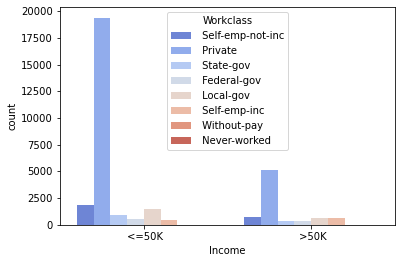

In [26]:
sns.countplot(df['Income'], palette='coolwarm', hue='Workclass', data=df)
plt.show()

**The Income <=50k and >50k is high in private workclass**

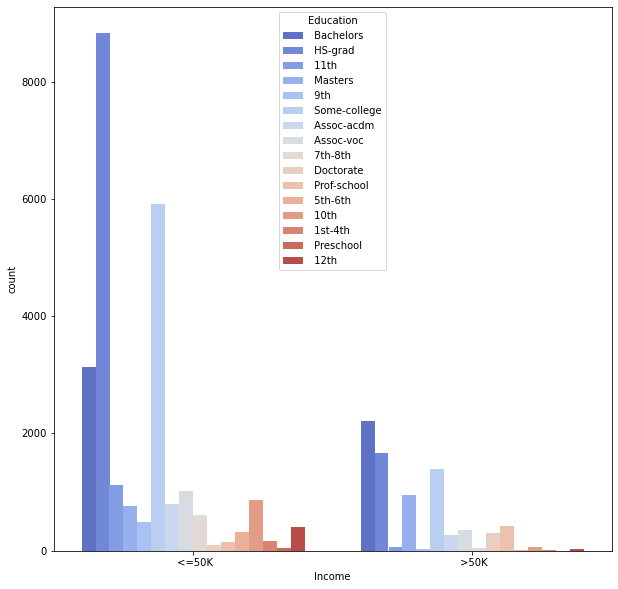

In [27]:
plt.figure(figsize = (10, 10))
sns.countplot(df['Income'], palette='coolwarm', hue='Education', data=df)
plt.show()

**The Income <=50k is high for HS-grad and Income >50k is high for Bachelors**

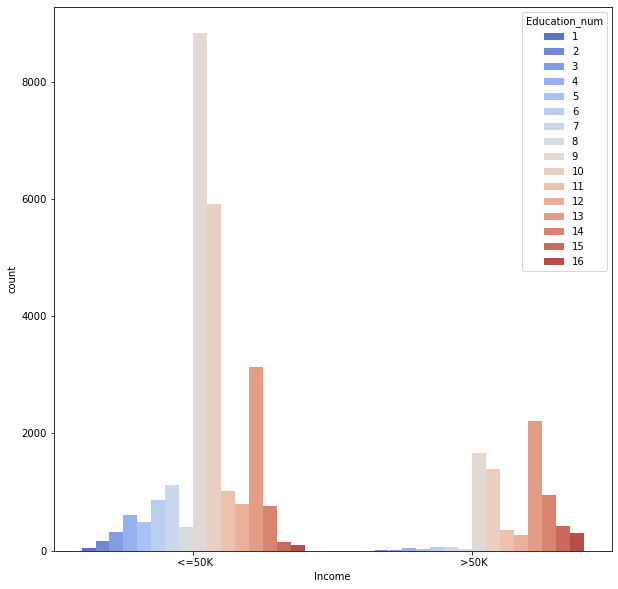

In [28]:
plt.figure(figsize = (10, 10))
sns.countplot(df['Income'], palette='coolwarm', hue='Education_num', data=df)
plt.show()

**The Income <=50k is high for Education_num 9 and Income >50k is high for Education_num 13**

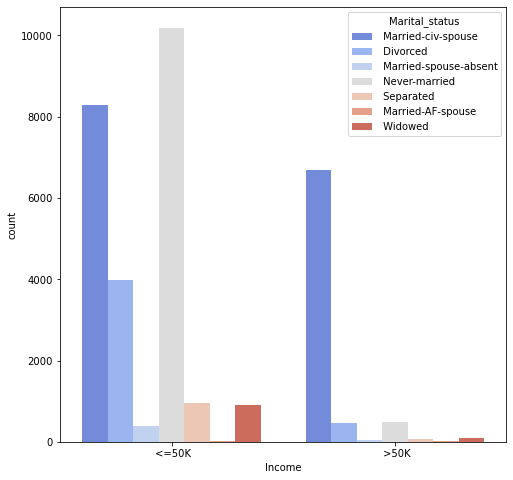

In [29]:
plt.figure(figsize = (8, 8))
sns.countplot(df['Income'], palette='coolwarm', hue='Marital_status', data=df)
plt.show()

**The Income <=50k is high for never-married persons and Income >50k is high for Married-civ-spouse**

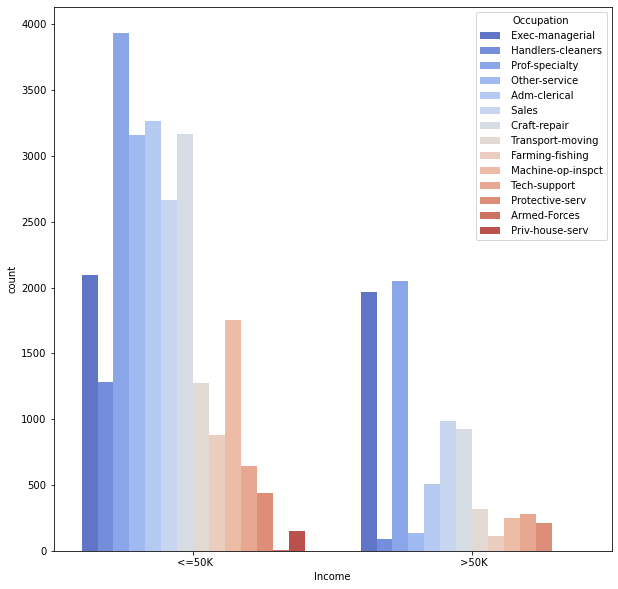

In [30]:
plt.figure(figsize = (10, 10))
sns.countplot(df['Income'], palette='coolwarm', hue='Occupation', data=df)
plt.show()

**The Income <=50k is high for prof-specialists and Income >50k is high for prof-specialists**

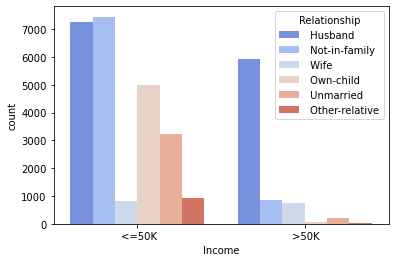

In [31]:
sns.countplot(df['Income'], palette='coolwarm', hue='Relationship', data=df)
plt.show()

**The Income <=50k is high for Not-in-family and Income >50k is high for Husband**

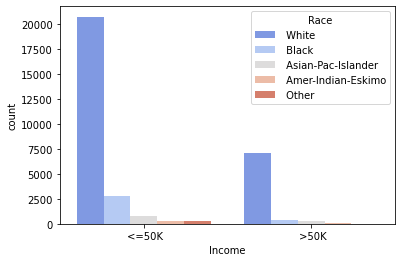

In [32]:
sns.countplot(df['Income'], palette='coolwarm', hue='Race', data=df)
plt.show()

**The Income <=50k is high for White persons and Income >50k is high for White persons**

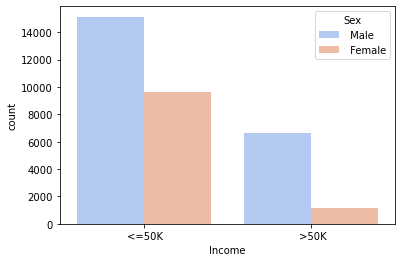

In [33]:
sns.countplot(df['Income'], palette='coolwarm', hue='Sex', data=df)
plt.show()

**The Income <=50k is high for males and Income >50k is high for males**

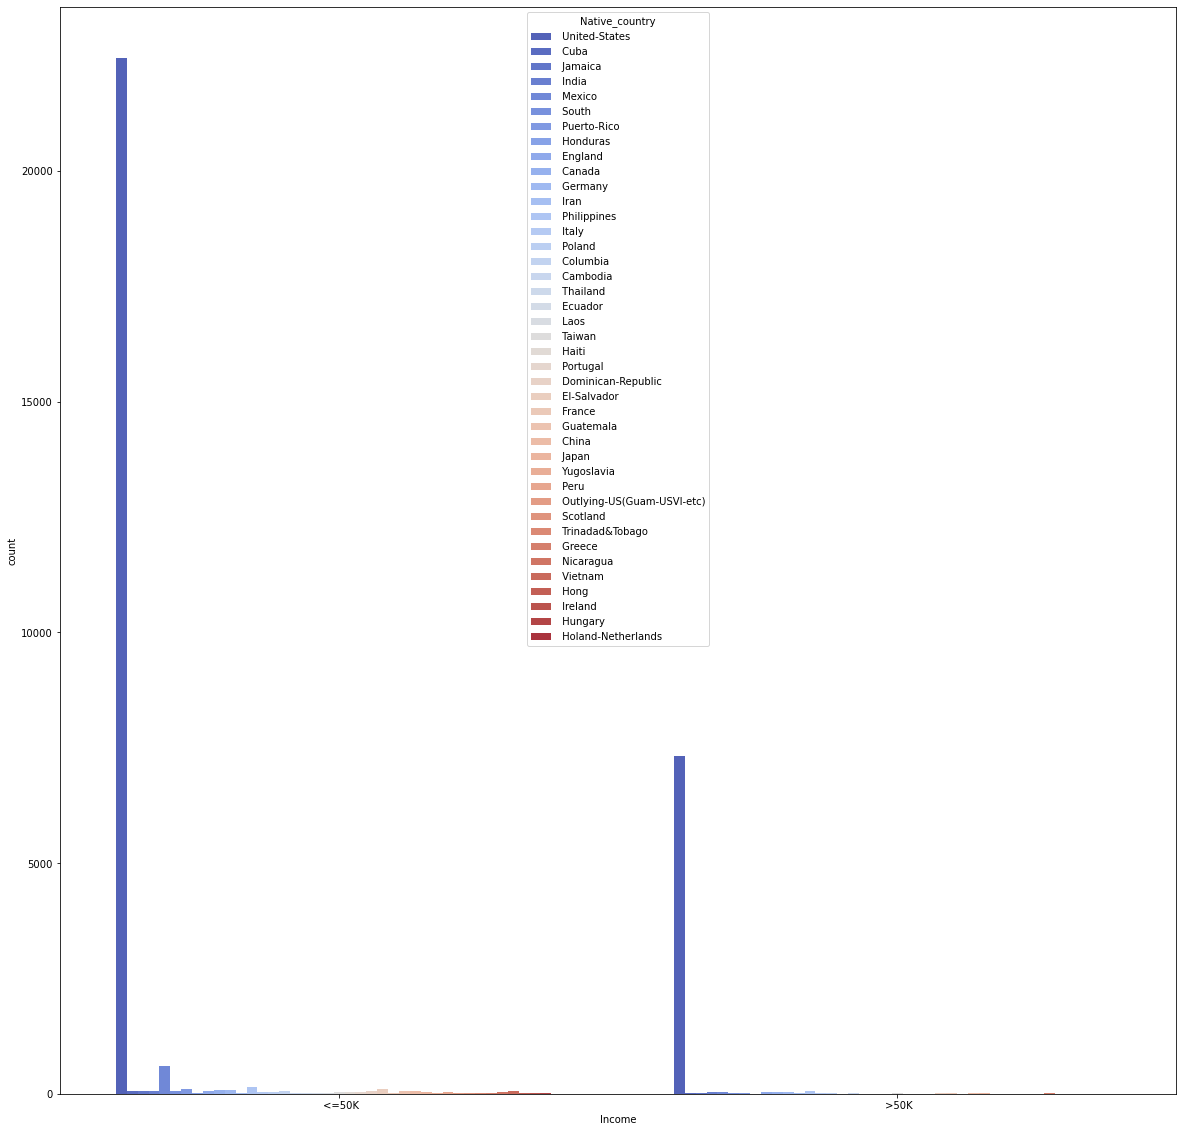

In [34]:
plt.figure(figsize = (20,20))
sns.countplot(df['Income'], palette='coolwarm', hue='Native_country', data=df)
plt.show()

**The Income <=50k and >50k is high for United states citizens**

# Generating charts for all Numerical variables

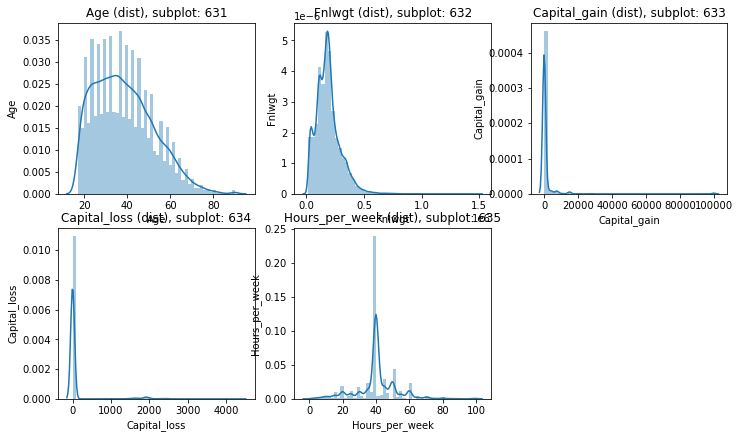

In [35]:
#Distplot for each column
Columns= ['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

#  plot Numerical Data
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,22))

for i in Columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.ylabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()

**Age:** The Age of people in our dataset lies between 18 to 90 years of Age. Maximum people lie in the Age range between 18 & 50.

**Fnlwgt:** The maximum values of Fnlwgt lie between 0 & 400000. We can observe that this data is right skewed.

**Capital_gain:** The Capital Gain of major data is 0. This data is also observed to be right skewed.

**Capital_loss:** The Capital loss of major data is 0. This data is also observed to be right skewed.

**Hours_per_week:** Majority of the people work 50 hours per week.

In [36]:
#Importing library for encoding and creating instance for the same 
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [37]:
#Converting object datatype into float values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0


**We can see that all our columns with string values are now converted into float values**

In [38]:
#Describing mean, median, min, max values of data
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


**Observations:**

* We can see there are very high values in the fnlwgt column.

* The standard deviation in few columns is very high, hence the data might be skewed.

* Observing the min and max values, we can also understand about the presence of huge outliers in our data.

* The values of data are widely scattered from low range to high range within the data, hence scaling data is very important.

In [39]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


<AxesSubplot:>

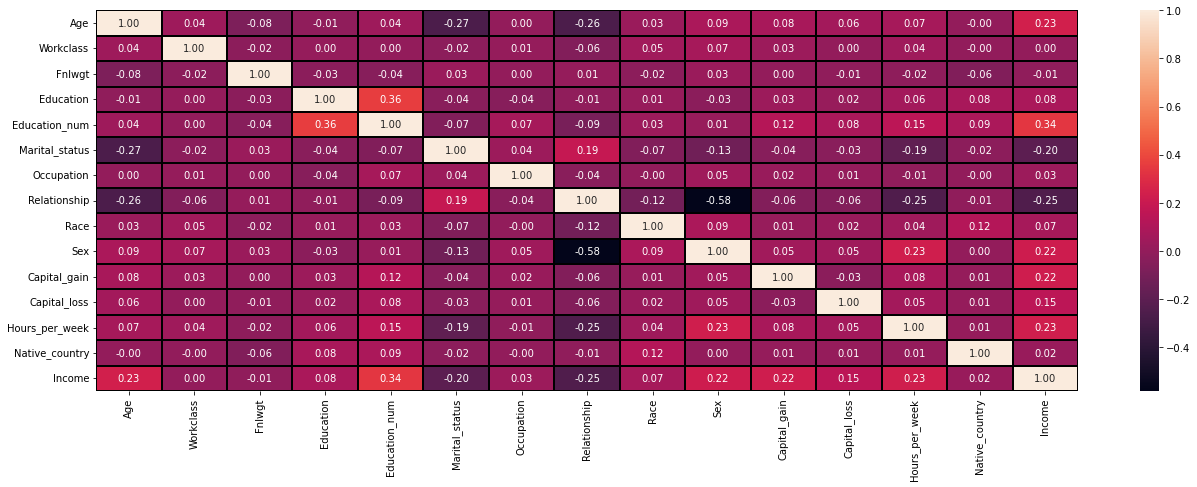

In [40]:
#Plotting correlation of input features with the target Variable
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

**Observations:**

* The most positively correlated column with the target variale is education_num

* The most negatively correalted column with the target variale is Relationship

* Only three Columns are negatively Correlated with the Target Variable.

In [42]:
corr_matrix=df.corr()
corr_matrix['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Race              0.071853
Occupation        0.034599
Native_country    0.023063
Workclass         0.002739
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

# Multi Variate Analysis

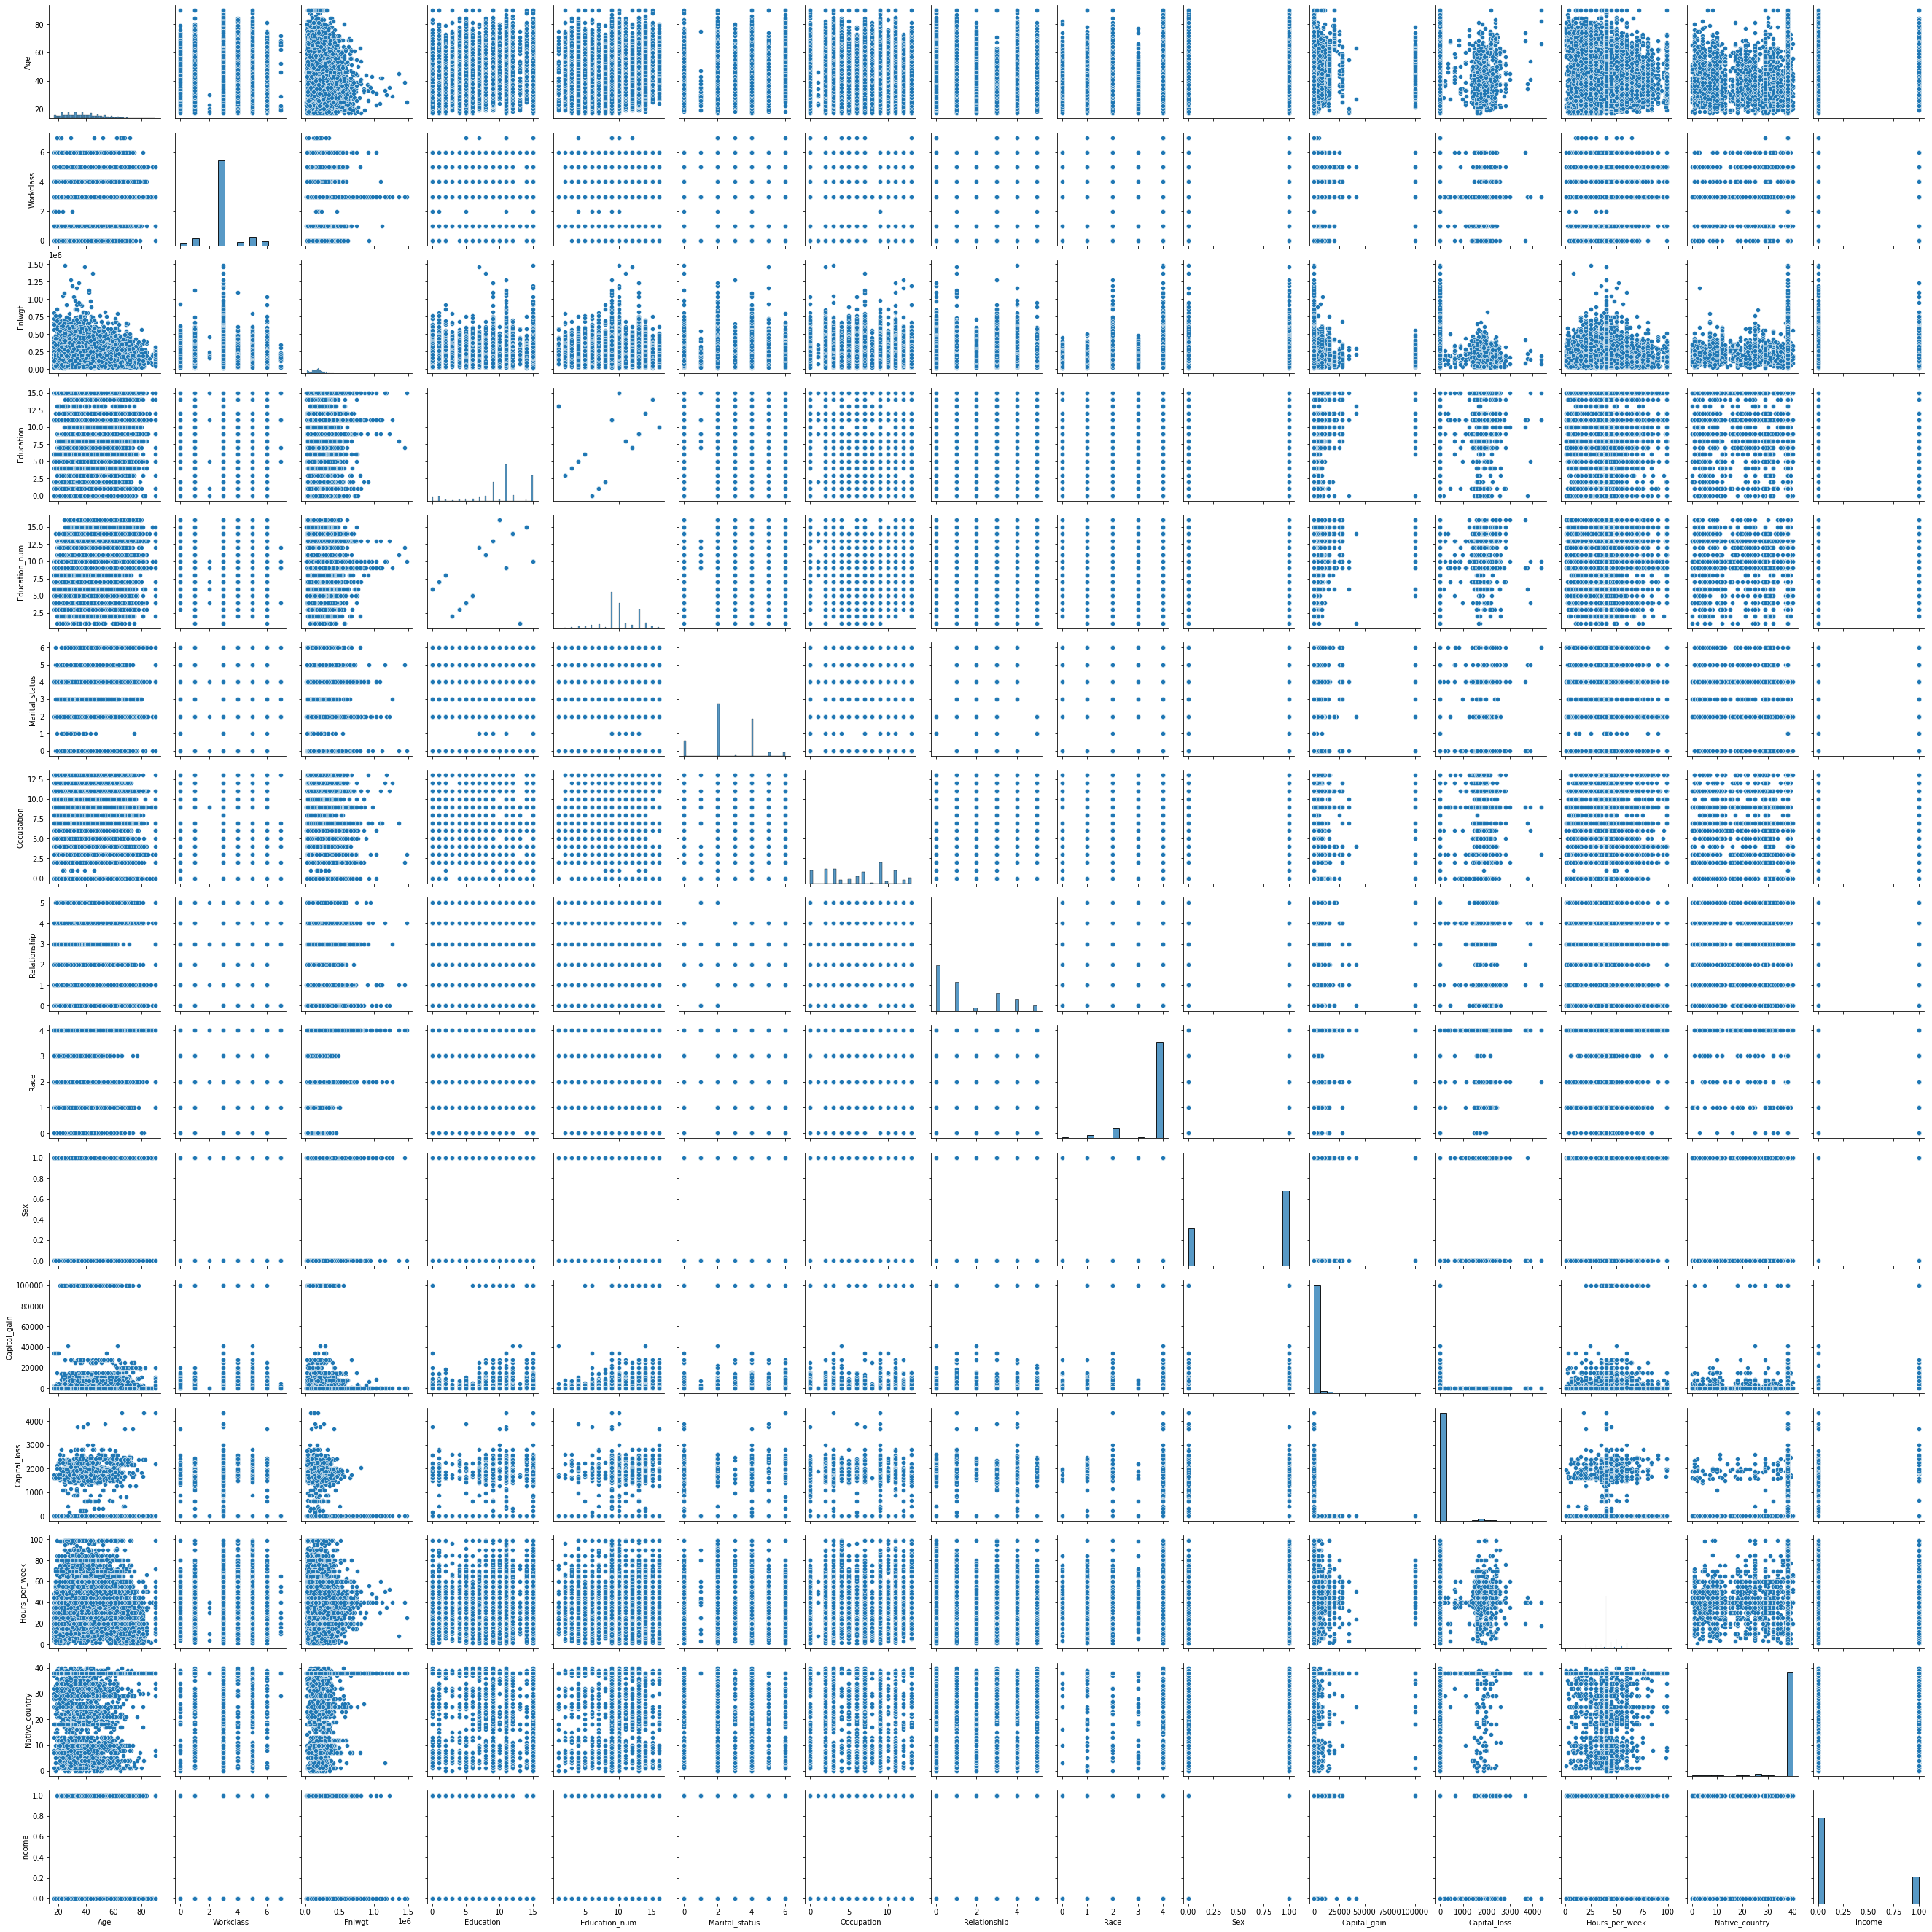

In [43]:
sns.pairplot(df)
plt.show()


# Checking Outliers using Boxplot

In [ ]:
#Plotting bosplot to check the outliers in the datset
df.plot(kind='box',subplots= True,layout=(6,3),figsize=(15,30))
plt.show()

# Removing Outliers

In [ ]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df))

In [ ]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

In [ ]:
loss_percent=((32560-27770)/32560)*100
loss_percent

**We can observe that there are too many outliers present in the majority of our columns. We tried resolving these outliers but we loose 14.71% of data which is a huge data loss and we might miss out on very important information. Hence, we will not resolve these outliers and proceed forawrd**

# Checking Skewness

In [44]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

 **We found skewness and lets remove skewness after splitting data**

# Splitting Independent(x) and Target(y) variables

In [45]:
#Creating x & y columns 
x=df.drop('Income',axis=1)
y=df['Income']

In [46]:
#Using power transform to remove skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.89194656,  1.74395129, -1.08988899, ..., -0.2212132 ,
        -2.22151541,  0.29440711],
       [ 0.10271741, -0.0961371 ,  0.39874263, ..., -0.2212132 ,
        -0.03557001,  0.29440711],
       [ 1.06438077, -0.0961371 ,  0.56254016, ..., -0.2212132 ,
        -0.03557001,  0.29440711],
       ...,
       [ 1.33455599, -0.0961371 , -0.2197547 , ..., -0.2212132 ,
        -0.03557001,  0.29440711],
       [-1.35834147, -0.0961371 ,  0.27166793, ..., -0.2212132 ,
        -1.65499204,  0.29440711],
       [ 1.00782289,  0.81710416,  0.98216482, ..., -0.2212132 ,
        -0.03557001,  0.29440711]])

**Skewness has been removed**

In [47]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler
#Scaling our data to improve model performance
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.89194656,  1.74395129, -1.08988899, ..., -0.2212132 ,
        -2.22151541,  0.29440711],
       [ 0.10271741, -0.0961371 ,  0.39874263, ..., -0.2212132 ,
        -0.03557001,  0.29440711],
       [ 1.06438077, -0.0961371 ,  0.56254016, ..., -0.2212132 ,
        -0.03557001,  0.29440711],
       ...,
       [ 1.33455599, -0.0961371 , -0.2197547 , ..., -0.2212132 ,
        -0.03557001,  0.29440711],
       [-1.35834147, -0.0961371 ,  0.27166793, ..., -0.2212132 ,
        -1.65499204,  0.29440711],
       [ 1.00782289,  0.81710416,  0.98216482, ..., -0.2212132 ,
        -0.03557001,  0.29440711]])

In [48]:
#checking shape of x and y
print(x.shape)
print(y.shape)

(32560, 14)
(32560,)


# Checking Best Random State

In [49]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"n Random_state",maxRS)

Best accuracy is 0.8341523341523341 n Random_state 109


**We have found best random_state value as 109. We will create our train_test_split using random_state(109)**

# Creating Model

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=109)

In [51]:
models=[LogisticRegression(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        BaggingClassifier()]


for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(models[model],"accuracy_score", accuracy_score(y_test,pred))

LogisticRegression() accuracy_score 0.8341523341523341
GaussianNB() accuracy_score 0.8082514332514332
DecisionTreeClassifier() accuracy_score 0.8112203112203112
KNeighborsClassifier() accuracy_score 0.8289312039312039
RandomForestClassifier() accuracy_score 0.8552416052416052
AdaBoostClassifier() accuracy_score 0.8609746109746109
BaggingClassifier() accuracy_score 0.846949221949222


**Here we observe that AdaBoostClassifier has best Accuracy compared to other models. Lets check cross validation score for best fit model**

# Checking Cross Validation score

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    print("Cross Validation Score for",models[model],scr.mean())

Cross Validation Score for LogisticRegression() 0.8251228501228501
Cross Validation Score for GaussianNB() 0.7981265356265357
Cross Validation Score for DecisionTreeClassifier() 0.8013513513513513
Cross Validation Score for KNeighborsClassifier() 0.8208845208845208
Cross Validation Score for RandomForestClassifier() 0.8505528255528256
Cross Validation Score for AdaBoostClassifier() 0.8559275184275185
Cross Validation Score for BaggingClassifier() 0.8386977886977887


**The difference between Accuracy and Cross_val_score is less for LogisticRegression,AdaBoostClassifier. Lets tune the model and check AUC_ROC for best model**

# Hyper Tuning the Model

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve

# LogisticRegression

In [55]:
LR_parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                  'C' : np.logspace(-4, 4, 20),
                  'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                  'max_iter' : [100, 1000,2500, 5000]}

LR=GridSearchCV(LogisticRegression(),LR_parameters,cv=5)

LR.fit(x_train,y_train)

LR.best_params_

{'C': 0.004832930238571752,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [56]:
LR_model=LogisticRegression(C= 0.0048,max_iter=100,penalty= 'l1',solver='liblinear')
LR_model.fit(x_train,y_train)

pred=LR_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

83.5995085995086
[[7100  406]
 [1196 1066]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      7506
         1.0       0.72      0.47      0.57      2262

    accuracy                           0.84      9768
   macro avg       0.79      0.71      0.73      9768
weighted avg       0.83      0.84      0.82      9768



In [57]:
#Precision: tp/tp+fp
print('Precision(<=50K) =' , 7100/(7100+406))
print('Precision(>50K) =', 1066/(1066+523))
# recall= tp/tp+fn
print('Recall(<=50K) =', 7100/(7100+406))
print('Recall(>50K) =', 1066/(1066+1196))

Precision(<=50K) = 0.9459099387156941
Precision(>50K) = 0.670862177470107
Recall(<=50K) = 0.9459099387156941
Recall(>50K) = 0.47126436781609193


# AUC ROC curve for LogisticRegression

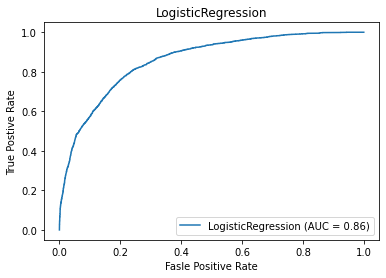

In [58]:
plot_roc_curve(LR_model,x_test,y_test)
plt.title("LogisticRegression")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()

# AdaBoostClassifier

In [59]:
ABC_parameters={'n_estimators':range(5,20),'algorithm':('SAMME','SAMME.R'),'random_state': range(20,40)}

ABC=GridSearchCV(AdaBoostClassifier(),ABC_parameters,cv=5)

ABC.fit(x_train,y_train)

ABC.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 16, 'random_state': 20}

In [60]:
ABC_model=AdaBoostClassifier(algorithm= 'SAMME.R', n_estimators= 16,random_state=20)
ABC_model.fit(x_train,y_train)

pred=ABC_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

85.63677313677314
[[7046  460]
 [ 943 1319]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      7506
         1.0       0.74      0.58      0.65      2262

    accuracy                           0.86      9768
   macro avg       0.81      0.76      0.78      9768
weighted avg       0.85      0.86      0.85      9768



In [61]:
#Precision: tp/tp+fp
print('Precision(<=50K) =' , 7046/(7046+943))
print('Precision(>50K) =', 1319/(1319+460))
# recall= tp/tp+fn
print('Recall(<=50K) =', 7046/(7046+460))
print('Recall(>50K) =', 1319/(1319+943))

Precision(<=50K) = 0.8819626987107273
Precision(>50K) = 0.7414277684092186
Recall(<=50K) = 0.9387156941113776
Recall(>50K) = 0.5831122900088417


# AUC ROC curve for AdaBoostClassifier

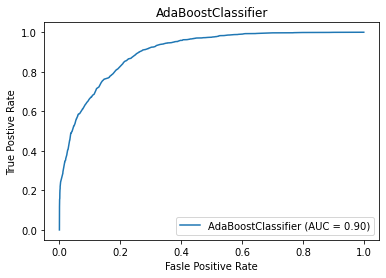

In [62]:
plot_roc_curve(ABC_model,x_test,y_test)
plt.title("AdaBoostClassifier")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()

After comparing Tuning Accuracy, precision, Recall, AUC_ROC for **LogisticRegression,AdaBoostClassifier** our best model is **AdaBoostClassifier**

After Hyper Tuning AdaBoostClassifier accuarcy score increased to 85.63 and AUC is 90.

In [63]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
model=AdaBoostClassifier()
model.fit(x_train,y_train)
print(model)
pre=model.predict(x_test)  
Acc=accuracy_score(y_test,pre)
recall = recall_score(y_test,pre, average='binary')
precision = precision_score(y_test,pre, average='binary')
f1 = f1_score(y_test, pre)

results = pd.DataFrame([['AdaBoostClassifier', Acc, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

AdaBoostClassifier()


,Model,Accuracy,Precision,Recall,F1 Score
0,AdaBoostClassifier,0.860975,0.756236,0.589744,0.662692


# Saving the Model

In [64]:
import pickle
filename = 'Census_Income.pkl'
pickle.dump(ABC_model,open(filename,'wb'))

# Conclusion

In [65]:
Final=np.array(y_test)
Final

array([0., 1., 0., ..., 0., 0., 1.])

In [66]:
predict=np.array(ABC_model.predict(x_test))

In [67]:
df_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))

In [68]:
df_pred

,original,predicted
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9763,0.0,0.0
9764,1.0,0.0
9765,0.0,0.0
9766,0.0,0.0
